# Import module

The link to get [ImageAnalysis3](https://github.com/zhengpuas47/ImageAnalysis3) 

Or from the Zhuang lab archived [source_tools](https://github.com/ZhuangLab/Chromatin_Analysis_2020_cell/tree/master/sequential_tracing/source)

## ImageAnalysis3 and basic modules

In [1]:
%run "C:\Users\shiwei\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\shiwei\Documents")

import ImageAnalysis3 as ia
from ImageAnalysis3 import *
from ImageAnalysis3.classes import _allowed_kwds

import h5py
import ast
import pandas as pd

print(os.getpid())

57188


## Chromatin_analysis_tools etc

See **functions** in the repository for [AnalysisTool_Chromatin](../../README.md)

In [2]:
# Chromatin_analysis_tools (ATC)
# Get path for the py containing functions
import os
import sys
import importlib
module_path =r'C:\Users\shiwei\Documents\AnalysisTool_Chromatin'
if module_path not in sys.path:
    sys.path.append(module_path)
    
# import relevant modules
import gene_selection 
importlib.reload(gene_selection)
import gene_to_loci
importlib.reload(gene_to_loci)
import gene_activity
importlib.reload(gene_activity)
import loci_1d_features
importlib.reload(loci_1d_features)  

import atac_to_loci
importlib.reload(atac_to_loci)

<module 'atac_to_loci' from 'C:\\Users\\shiwei\\Documents\\AnalysisTool_Chromatin\\atac_to_loci.py'>

# Define folders

In [3]:
# main folder for postanalysis
postanalysis_folder = r'L:\Shiwei\postanalysis_2024\v0'
# input files for postanalysis
input_folder = os.path.join(postanalysis_folder, 'resources_from_preprocess')

# output file to be generated
output_main_folder = os.path.join(postanalysis_folder, 'higher_order_chromosome')

output_analysis_folder = os.path.join(output_main_folder, 'analysis')
output_figure_folder = os.path.join(output_main_folder, 'figures')

# make new folder if needed
make_output_folder = True

if make_output_folder and not os.path.exists(output_analysis_folder):
    os.makedirs(output_analysis_folder)
    print(f'Generating analysis folder: {output_analysis_folder}.')
elif os.path.exists(output_analysis_folder):
    print(f'Use existing analysis folder: {output_analysis_folder}.')
    
if make_output_folder and not os.path.exists(output_figure_folder):
    os.makedirs(output_figure_folder)
    print(f'Generating figure folder: {output_figure_folder}.')
elif os.path.exists(output_figure_folder):
    print(f'Use existing figure folder: {output_figure_folder}.')

Use existing analysis folder: L:\Shiwei\postanalysis_2024\v0\higher_order_chromosome\analysis.
Use existing figure folder: L:\Shiwei\postanalysis_2024\v0\higher_order_chromosome\figures.


# Plotting parameters

In [4]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _double_col_width, _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

import seaborn as sns
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})  

In [5]:
# Other required plotting parameters
_dpi = 300
_font_size = 7
_page_width = 5.5


## cell type color-codes

In [6]:
# cell labels from RNA-MERFISH and celltype prediction
selected_cell_labels = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',
                           'Sst','Pvalb','Lamp5','Sncg','Vip',
                           'Astro','Oligo','OPC','Micro','Endo','VLMC','SMC','Peri', 
                           #'other',
                          ]
# cell palette from RNA-MERFISH UMAP and stats
celltype_palette = {'Astro':'lightcoral', 
                    'Endo':'skyblue', 
                    'L2/3 IT':'gold', 
                    'L4/5 IT':'darkorange', 
                    'L5 ET':'mediumseagreen', 
                    'L5 IT':'aqua',
                    'L5/6 NP':'darkgreen',
                    'L6 CT':'brown',
                    'L6 IT':'magenta',
                    'L6b':'blue', 
                    'Lamp5':'orange', 
                    'Micro':'peachpuff',
                    'OPC':'thistle', 
                    'Oligo':'darkviolet',
                    'Peri':'sandybrown',
                    'Pvalb':'springgreen',
                    'SMC':'rosybrown',
                    'Sncg':'darkkhaki',
                    'Sst':'steelblue', 
                    'VLMC':'saddlebrown', 
                    'Vip':'red',
                    'other':'slategray'}


In [7]:
# this is the plotting order noted based on the snRNA transcriptional acitivty if needed
sorted_cellplot_order_byRNA = ['Micro', 'Oligo', 'Endo', 'OPC', 'Astro', 'Vip', 'Lamp5',
                  'L5/6 NP', 'Sst', 'Sncg', 'Pvalb', 'L4/5 IT', 'L6 CT',
                  'L6 IT', 'L6b', 'L2/3 IT', 'L5 IT', 'L5 ET']

# Load data relevant information

## load and format codebook

[merged codebook](../resources/merged_codebook.csv) as in the repository (merged for all DNA-MERFISH libraries)

In [8]:
# Load codebook 
codebook_fname = os.path.join(input_folder,'merged_codebook.csv')
codebook_df = pd.read_csv (codebook_fname, index_col=0)

# sort df by chr and chr_order
codebook_df = loci_1d_features.sort_loci_df_by_chr_order (codebook_df)
codebook_df.head()

,name,id,NDB_784,NDB_755,NDB_826,NDB_713,NDB_865,NDB_725,NDB_817,NDB_710,...,NDB_479,NDB_562,NDB_608,NDB_460,NDB_563,NDB_592,NDB_368,NDB_436,NDB_629,NDB_604
0,1:3742742-3759944,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1:6245958-6258969,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1:8740008-8759916,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1016,1:9627926-9637875,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017,1:9799472-9811359,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
# Format the chr loci name by 
# 1. changing loci name format
# 2. extract relevant information such as id, chr, chr_order, and library etc
from gene_to_loci import loci_pos_format
loci_name_list = list(map(loci_pos_format, codebook_df['name'].tolist()))
loci_name_arr = np.array(loci_name_list)

# convert to a new dataframe and set loci name as index
codebook_df = codebook_df[['name','id','chr','chr_order','library']]
codebook_df['loci_name'] = list(loci_name_arr[:,0])
codebook_df = codebook_df.set_index ('loci_name')

codebook_df.head()

,name,id,chr,chr_order,library
loci_name,,,,,
chr1_3742742_3759944,1:3742742-3759944,1,1,0.0,CTP11
chr1_6245958_6258969,1:6245958-6258969,2,1,1.0,CTP11
chr1_8740008_8759916,1:8740008-8759916,3,1,2.0,CTP11
chr1_9627926_9637875,1:9627926-9637875,1,1,3.0,CTP13
chr1_9799472_9811359,1:9799472-9811359,2,1,4.0,CTP13


# Load distance matrices and contact matrices

In [10]:
# Load class_2_median
# class to median distance dict
class_2_median_filename = os.path.join(input_folder, 'subclass_2_medianDict.pkl')

class_2_medianDict = pickle.load(open(class_2_median_filename, 'rb'))
print(class_2_medianDict.keys())

dict_keys(['Oligo', 'L5 IT', 'Micro', 'Peri', 'Endo', 'Astro', 'OPC', 'L6 CT', 'L5 ET', 'L5/6 NP', 'Pvalb', 'L6 IT', 'Lamp5', 'L6b', 'Sst', 'SMC', 'L4/5 IT', 'L2/3 IT', 'Vip', 'Sncg', 'VLMC'])


In [11]:
class_2_contact_filename = os.path.join(input_folder, 'subclass_2_contactDict_750.pkl')

class_2_contactDict = pickle.load(open(class_2_contact_filename, 'rb'))
print(class_2_contactDict.keys())

dict_keys(['Oligo', 'L5 IT', 'Micro', 'Peri', 'Endo', 'Astro', 'OPC', 'L6 CT', 'L5 ET', 'L5/6 NP', 'Pvalb', 'L6 IT', 'Lamp5', 'L6b', 'Sst', 'SMC', 'L4/5 IT', 'L2/3 IT', 'Vip', 'Sncg', 'VLMC'])


# Plot distmap with summarizing insulation

In [12]:
from ImageAnalysis3.structure_tools import distance
#codebook_df = df_refgen.copy(deep=True)
sel_codebook = codebook_df

sort_by_region=False
chr_2_indices, chr_2_orders = distance.Generate_PlotOrder(codebook_df, codebook_df, sort_by_region=False)## load codebook

In [13]:
from matplotlib.colors import LogNorm
import ImageAnalysis3.structure_tools.distance as distance

#from ImageAnalysis3.domain_tools.distance import _sliding_window_dist
import insulation
reload(insulation)

from insulation import sliding_window_insulation, sliding_window_insulation_by_gene_dist
from scipy.signal import find_peaks

## insulation profile across selected chromosome

In [14]:
megadomain_boundry_byChr = {'1':89, '2':70, '3':55, #'5':70, 
                            '6':55, '7':30,'8':42,'12':35,'14':65}

## chromosome 1

C:\Users\shiwei\Documents\ImageAnalysis3\figure_tools\distmap.py:91: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.gcf().subplots_adjust(bottom=0.15*bool(ax_label),
C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_57188\1441334124.py:124: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(wspace=2, hspace=0.15, left=0.1, right=0.9, top=0.97, bottom=0.02)
meta NOT subset; don't know how to subset; dropped


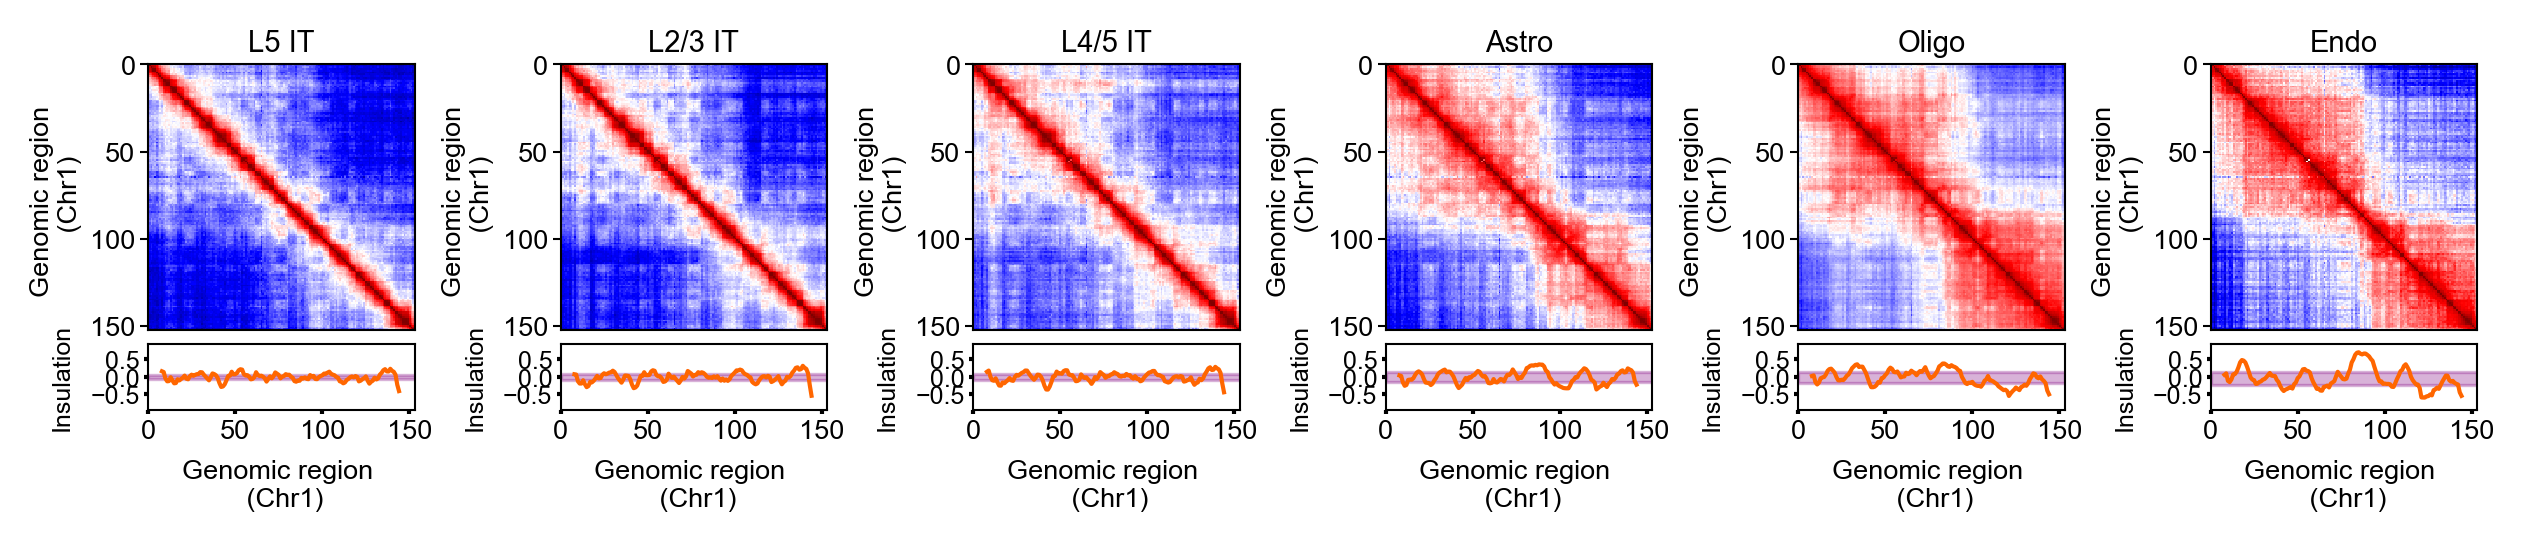

In [15]:
%matplotlib inline

wd_size = 16

#plt.style.use('dark_background')

for chosen_chrom in ['1', ][:]:
    
    sel_cellgroups = ['L5 IT', 'L2/3 IT', 'L4/5 IT','Astro','Oligo','Endo',]
    
    fig, axes = plt.subplots(1, len(sel_cellgroups), figsize=(_page_width/4*1*len(sel_cellgroups), 
                                                              _page_width/4*1.1), dpi=300, #sharex=True, sharey=True
                             constrained_layout=True,
                                       )
    
    
    
    chr_2_indices, chr_2_orders = distance.Generate_PlotOrder(codebook_df, 
                                                              codebook_df, 
                                                              sort_by_region=sort_by_region)## load codebook
      
    _single_im_size=3
    sel_codebook = codebook_df
    
    for _idx, _class in enumerate(sel_cellgroups):

        # 1. plot distmap
        summary_dict = class_2_medianDict[_class]
        _cis_mat, chr_edges, chr_names = distance.assemble_ChrDistDict_2_Matrix(
                summary_dict, codebook_df, 
                sel_codebook=sel_codebook, 
                use_cis=True, sort_by_region=sort_by_region,
            )

        _chr_indices = chr_2_indices[chosen_chrom]
        cis_mat_chr = _cis_mat[:,_chr_indices]
        cis_mat_chr = cis_mat_chr[_chr_indices,:]

        if chosen_chrom in [str(c) for c in range(10,20)]:
            color_limits_class = [0.5, 3]
        else:
            color_limits_class = [0.5, 3]
            

        ax_label=f'Genomic region \n (Chr{chosen_chrom})'

            
        ia.figure_tools.distmap.plot_distance_map(cis_mat_chr, color_limits=color_limits_class,
                                          ax=axes[_idx], 
                                        ticks=[i for i in np.arange(0,len(cis_mat_chr)) if i%50==0],
                                          tick_labels=[i for i in np.arange(0,len(cis_mat_chr)) if i%50==0],
                                          add_colorbar=False, # plot colorbar manually below
                                          ax_label=ax_label, 
                                          cmap='seismic_r',
                                          font_size=6.5)

        axes[_idx].grid(False)
        #axes[_idx].grid(True,color='g', linestyle='-', linewidth=0.5)
        #axes[_key_idx, _idx].set_title(f'{_class}, N={len(class_2_info_Dict[_class])}', fontsize=7, pad=3)
        axes[_idx].set_title(f'{_class}', fontsize=7, pad=3)
        axes[_idx].xaxis.set_tick_params(which='both', labelbottom=False, bottom=False)
        axes[_idx].set_xlabel('')
        
        
        
        # 2. plot insulation profile
        summary_dict = class_2_contactDict[_class]
        _cis_mat, chr_edges, chr_names = distance.assemble_ChrDistDict_2_Matrix(
                summary_dict, codebook_df, 
                sel_codebook=codebook_df, 
                use_cis=True, sort_by_region=sort_by_region,
            )

        _chr_indices = chr_2_indices[chosen_chrom]
        cis_mat_chr = _cis_mat[:,_chr_indices]
        cis_mat_chr = cis_mat_chr[_chr_indices,:]

        distance_wd_dists = sliding_window_insulation(cis_mat_chr, _wd=wd_size, 
                                                 _dist_metric='normed_insulation')

        distance_peaks = find_peaks(-distance_wd_dists, distance=5, 
                                    prominence=0.05, width=1)
        
        from mpl_toolkits.axes_grid1 import make_axes_locatable
        divider = make_axes_locatable(axes[_idx])
        line_ax = divider.append_axes('bottom', size='25%', pad="5%", sharex=axes[_idx])
        
        
        
        
        # invert because the sliding_window_insulation is from intra-inter: high intra gives high value 
        line_ax.plot(distance_wd_dists, color=[1,0.4,0], 
                 #label=f'{_class}', 
                linewidth=1.0)
        #for _p in distance_peaks[0]:
            #ax.vlines(_p, -1, 1, linewidth=1.5, linestyles="dotted",color='k' )

        #print(len(distance_peaks[0]))
        ins_IQR = np.nanpercentile(distance_wd_dists,75)-np.nanpercentile(distance_wd_dists,25)
        #print(_class, f'{len(distance_peaks[0])} peaks', ins_IQR)

        line_ax.fill_between(x = [0,len(cis_mat_chr)],
                        y1=np.nanpercentile(distance_wd_dists,25), 
                         y2=np.nanpercentile(distance_wd_dists,75), 
                        alpha =0.3,
                         color='purple' )

        #ax.annotate(f'{_class}',(105,0.5), fontsize=_font_size)
        line_ax.tick_params(axis='y', pad=1,labelsize=6, length=1) 
        line_ax.grid(False)

        line_ax.set_ylim([-0.95,.95])
        line_ax.set_xlim([0,len(cis_mat_chr)])
        

        line_ax.set_ylabel(f'Insulation', rotation=90,fontsize=6)
        line_ax.set_xlabel(f'Genomic region \n (Chr{chosen_chrom})',fontsize=6.5)
        line_ax.tick_params(axis='x', rotation=0, pad=1,labelsize=6.5, length=1) 
        [i[1].set_linewidth(0.5) for i in line_ax.spines.items()]
        
        #plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)


    fig.subplots_adjust(wspace=2, hspace=0.15, left=0.1, right=0.9, top=0.97, bottom=0.02)
    plt.savefig(os.path.join(output_figure_folder, f'distmap_megadomain_insulation_wd{wd_size}_chr{chosen_chrom}.pdf'), 
                transparent=True, dpi=300, bbox_inches='tight')    
    plt.show()

## other chromosomes

C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_57188\73792371.py:124: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(wspace=2, hspace=0.15, left=0.1, right=0.9, top=0.97, bottom=0.02)
meta NOT subset; don't know how to subset; dropped


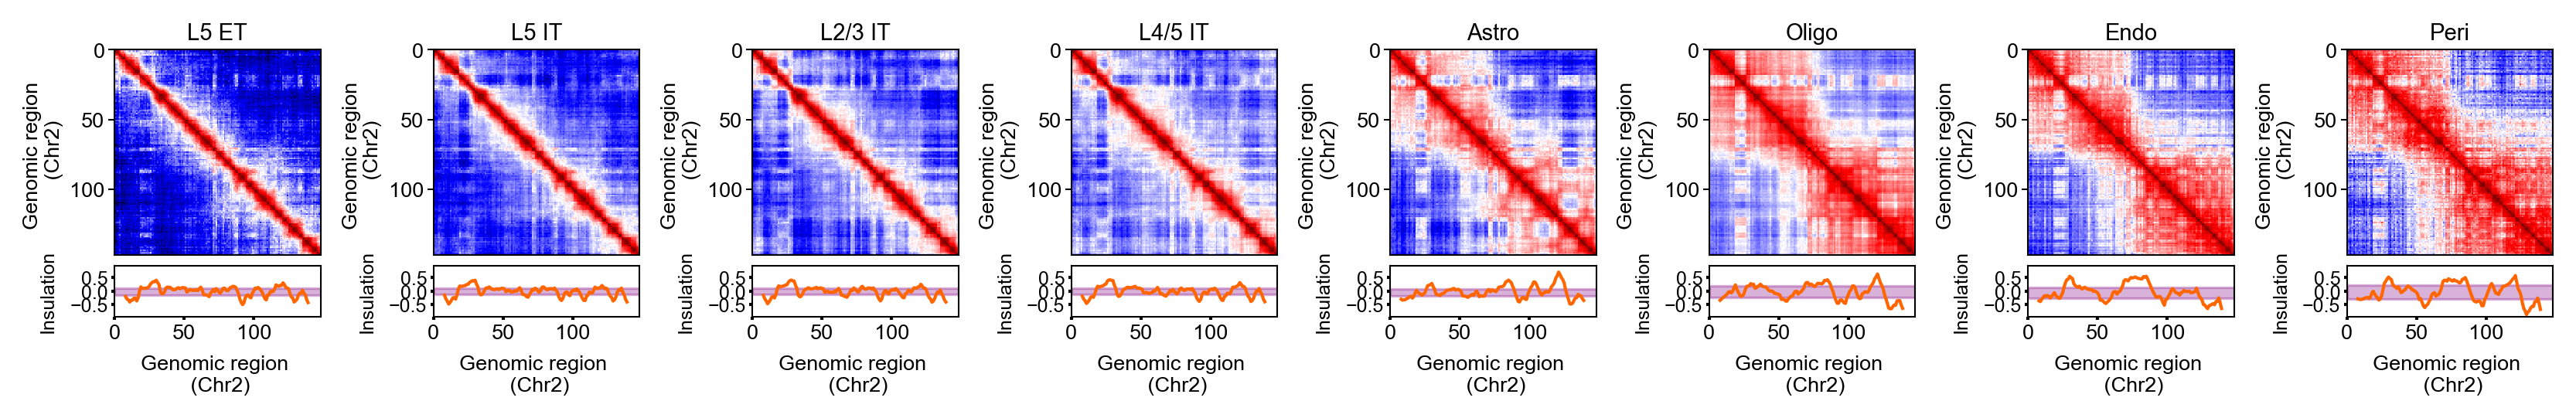

meta NOT subset; don't know how to subset; dropped


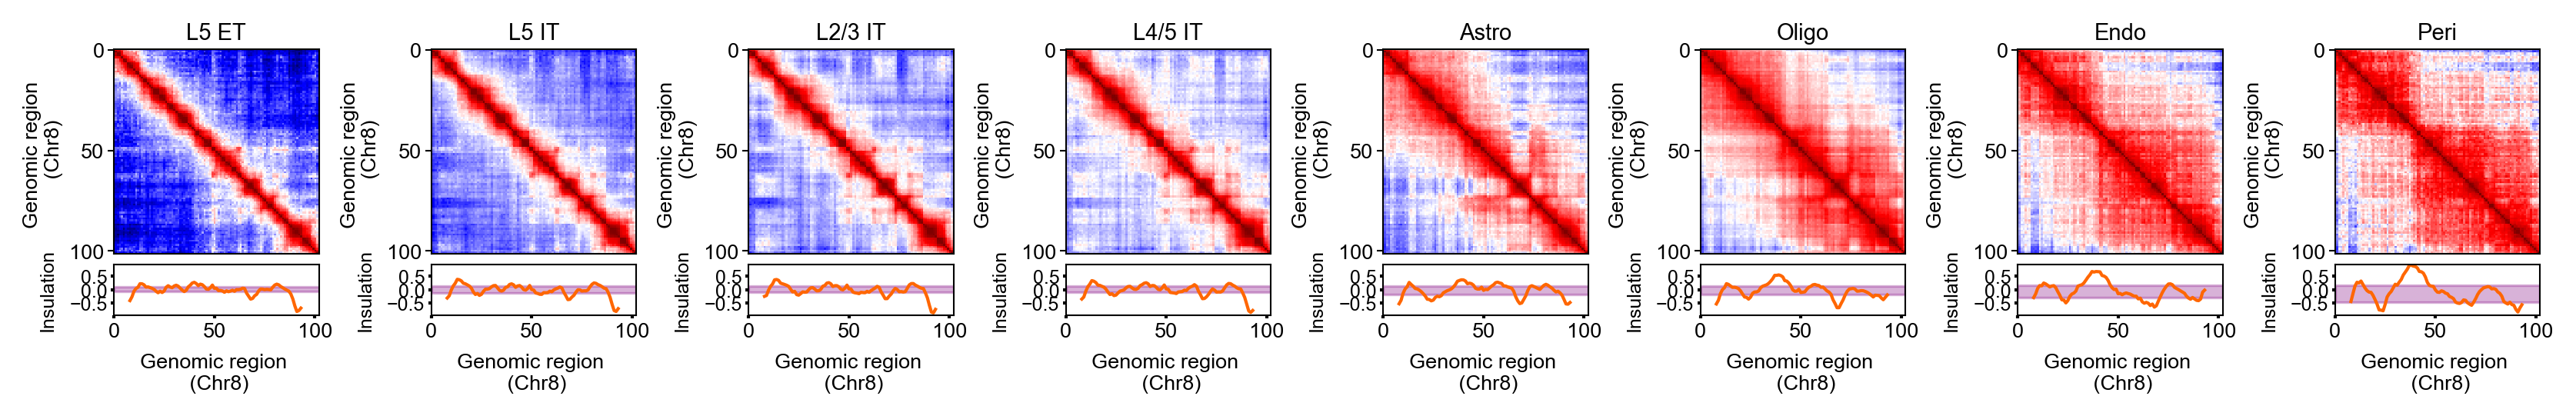

In [16]:
%matplotlib inline

wd_size = 16

#plt.style.use('dark_background')

for chosen_chrom in ['2', '8'][:]:
    
    sel_cellgroups = ['L5 ET','L5 IT', 'L2/3 IT', 'L4/5 IT','Astro','Oligo','Endo', 'Peri']
    
    fig, axes = plt.subplots(1, len(sel_cellgroups), figsize=(_page_width/4*1*len(sel_cellgroups), 
                                                              _page_width/4*1.1), dpi=300, #sharex=True, sharey=True
                             constrained_layout=True,
                                       )
    
    
    
    chr_2_indices, chr_2_orders = distance.Generate_PlotOrder(codebook_df, 
                                                              codebook_df, 
                                                              sort_by_region=sort_by_region)## load codebook
      
    _single_im_size=3
    sel_codebook = codebook_df
    
    for _idx, _class in enumerate(sel_cellgroups):

        # 1. plot distmap
        summary_dict = class_2_medianDict[_class]
        _cis_mat, chr_edges, chr_names = distance.assemble_ChrDistDict_2_Matrix(
                summary_dict, codebook_df, 
                sel_codebook=sel_codebook, 
                use_cis=True, sort_by_region=sort_by_region,
            )

        _chr_indices = chr_2_indices[chosen_chrom]
        cis_mat_chr = _cis_mat[:,_chr_indices]
        cis_mat_chr = cis_mat_chr[_chr_indices,:]

        if chosen_chrom in [str(c) for c in range(10,20)]:
            color_limits_class = [0.5, 3]
        else:
            color_limits_class = [0.5, 3]
            

        ax_label=f'Genomic region \n (Chr{chosen_chrom})'

            
        ia.figure_tools.distmap.plot_distance_map(cis_mat_chr, color_limits=color_limits_class,
                                          ax=axes[_idx], 
                                        ticks=[i for i in np.arange(0,len(cis_mat_chr)) if i%50==0],
                                          tick_labels=[i for i in np.arange(0,len(cis_mat_chr)) if i%50==0],
                                          add_colorbar=False, # plot colorbar manually below
                                          ax_label=ax_label, 
                                          cmap='seismic_r',
                                          font_size=6.5)

        axes[_idx].grid(False)
        #axes[_idx].grid(True,color='g', linestyle='-', linewidth=0.5)
        #axes[_key_idx, _idx].set_title(f'{_class}, N={len(class_2_info_Dict[_class])}', fontsize=7, pad=3)
        axes[_idx].set_title(f'{_class}', fontsize=7, pad=3)
        axes[_idx].xaxis.set_tick_params(which='both', labelbottom=False, bottom=False)
        axes[_idx].set_xlabel('')
        
        
        
        # 2. plot insulation profile
        summary_dict = class_2_contactDict[_class]
        _cis_mat, chr_edges, chr_names = distance.assemble_ChrDistDict_2_Matrix(
                summary_dict, codebook_df, 
                sel_codebook=codebook_df, 
                use_cis=True, sort_by_region=sort_by_region,
            )

        _chr_indices = chr_2_indices[chosen_chrom]
        cis_mat_chr = _cis_mat[:,_chr_indices]
        cis_mat_chr = cis_mat_chr[_chr_indices,:]

        distance_wd_dists = sliding_window_insulation(cis_mat_chr, _wd=wd_size, 
                                                 _dist_metric='normed_insulation')

        distance_peaks = find_peaks(-distance_wd_dists, distance=5, 
                                    prominence=0.05, width=1)
        
        from mpl_toolkits.axes_grid1 import make_axes_locatable
        divider = make_axes_locatable(axes[_idx])
        line_ax = divider.append_axes('bottom', size='25%', pad="5%", sharex=axes[_idx])
        
        
        
        
        # invert because the sliding_window_insulation is from intra-inter: high intra gives high value 
        line_ax.plot(distance_wd_dists, color=[1,0.4,0], 
                 #label=f'{_class}', 
                linewidth=1.0)
        #for _p in distance_peaks[0]:
            #ax.vlines(_p, -1, 1, linewidth=1.5, linestyles="dotted",color='k' )

        #print(len(distance_peaks[0]))
        ins_IQR = np.nanpercentile(distance_wd_dists,75)-np.nanpercentile(distance_wd_dists,25)
        #print(_class, f'{len(distance_peaks[0])} peaks', ins_IQR)

        line_ax.fill_between(x = [0,len(cis_mat_chr)],
                        y1=np.nanpercentile(distance_wd_dists,25), 
                         y2=np.nanpercentile(distance_wd_dists,75), 
                        alpha =0.3,
                         color='purple' )

        #ax.annotate(f'{_class}',(105,0.5), fontsize=_font_size)
        line_ax.tick_params(axis='y', pad=1,labelsize=6, length=1) 
        line_ax.grid(False)

        line_ax.set_ylim([-0.95,.95])
        line_ax.set_xlim([0,len(cis_mat_chr)])
        

        line_ax.set_ylabel(f'Insulation', rotation=90,fontsize=6)
        line_ax.set_xlabel(f'Genomic region \n (Chr{chosen_chrom})',fontsize=6.5)
        line_ax.tick_params(axis='x', rotation=0, pad=1,labelsize=6.5, length=1) 
        [i[1].set_linewidth(0.5) for i in line_ax.spines.items()]
        
        #plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)


    fig.subplots_adjust(wspace=2, hspace=0.15, left=0.1, right=0.9, top=0.97, bottom=0.02)
    plt.savefig(os.path.join(output_figure_folder, f'distmap_megadomain_insulation_wd{wd_size}_chr{chosen_chrom}.pdf'), 
                transparent=True, dpi=300, bbox_inches='tight')    
    plt.show()